In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Project 1\\bookings_cleaned1.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guests
0,Resort Hotel,0,296.0,2015,July,27,1,0.0,0.0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,296.0,2015,July,27,1,0.0,0.0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7.0,2015,July,27,1,0.0,1.0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1.0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


## Feature Selection

In [3]:
data1 = data.copy()

categorical_feature = [feature for feature in data1.columns if data1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(categorical_feature))

Number of Categorical Features are :  12


In [4]:
# replacing "undefined" values in meal, market_segment and distribution channel columns
data1["meal"].replace("Undefined", "SC", inplace=True)
data1["market_segment"].replace("Undefined", "Online TA", inplace=True)
data1["distribution_channel"].replace("Undefined", "TA/TO", inplace=True)

In [5]:
# Creating a new column which shows 1 for values if the customer got the same
# room as he reserved
data1['room'] = 0
data1.loc[data1['reserved_room_type']==data1["assigned_room_type"], 'room'] = 1

In [6]:
# Creating a new column which shows 1 if the previous cancellations are more than previously not cancelled
data1['net_canceled'] = 0
data1.loc[data1['previous_cancellations']>data1["previous_bookings_not_canceled"], 'net_canceled'] = 1

In [7]:
# mapping months to number
data1['arrival_date_month'] = data1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [8]:
# encoding hotel column
data1['hotel'] = data1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

In [9]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
data1['meal'] = LabelEncoder().fit_transform(data1['meal'])

data1['deposit_type'] = LabelEncoder().fit_transform(data1['deposit_type'])

data1['customer_type'] = LabelEncoder().fit_transform(data1['customer_type'])

data1['market_segment'] = LabelEncoder().fit_transform(data1['market_segment'])

data1['distribution_channel'] = LabelEncoder().fit_transform(data1['distribution_channel'])

data1['reserved_room_type'] = LabelEncoder().fit_transform(data1['reserved_room_type'])

data1['assigned_room_type']= LabelEncoder().fit_transform(data1['assigned_room_type'])

data1['reservation_status'] = LabelEncoder().fit_transform(data1['reservation_status'])

data1['reservation_status_date'] = LabelEncoder().fit_transform(data1['reservation_status_date'])

data1['country'] = LabelEncoder().fit_transform(data1['country'])

In [10]:
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guests,room,net_canceled
0,0,0,296.0,2015,7,27,1,0.0,0.0,0,135,3,1,0,0,0,2,2,3,0,0,0,2,0.0,0,0,1,121,2,1,0
1,0,0,296.0,2015,7,27,1,0.0,0.0,0,135,3,1,0,0,0,2,2,4,0,0,0,2,0.0,0,0,1,121,2,1,0
2,0,0,7.0,2015,7,27,1,0.0,1.0,0,59,3,1,0,0,0,0,2,0,0,0,0,2,75.0,0,0,1,122,1,0,0
3,0,0,13.0,2015,7,27,1,0.0,1.0,0,59,2,0,0,0,0,0,0,0,0,304,0,2,75.0,0,0,1,122,1,1,0
4,0,0,14.0,2015,7,27,1,0.0,2.0,0,59,6,3,0,0,0,0,0,0,0,240,0,2,98.0,0,1,1,123,2,1,0


## Correlation Analysis

In [11]:
data1.corr()["is_canceled"].sort_values()

reservation_status               -0.888729
required_car_parking_spaces      -0.184519
total_of_special_requests        -0.120851
booking_changes                  -0.093295
is_repeated_guest                -0.088802
assigned_room_type               -0.060871
previous_bookings_not_canceled   -0.052198
reservation_status_date          -0.033078
customer_type                    -0.030789
agent                            -0.001164
arrival_date_week_number          0.001654
arrival_date_month                0.003918
days_in_waiting_list              0.004699
arrival_date_day_of_month         0.005422
reserved_room_type                0.047454
meal                              0.047993
previous_cancellations            0.051491
stays_in_weekend_nights           0.060500
hotel                             0.072076
stays_in_week_nights              0.086744
arrival_date_year                 0.088013
country                           0.094438
guests                            0.098852
adr        

<AxesSubplot:>

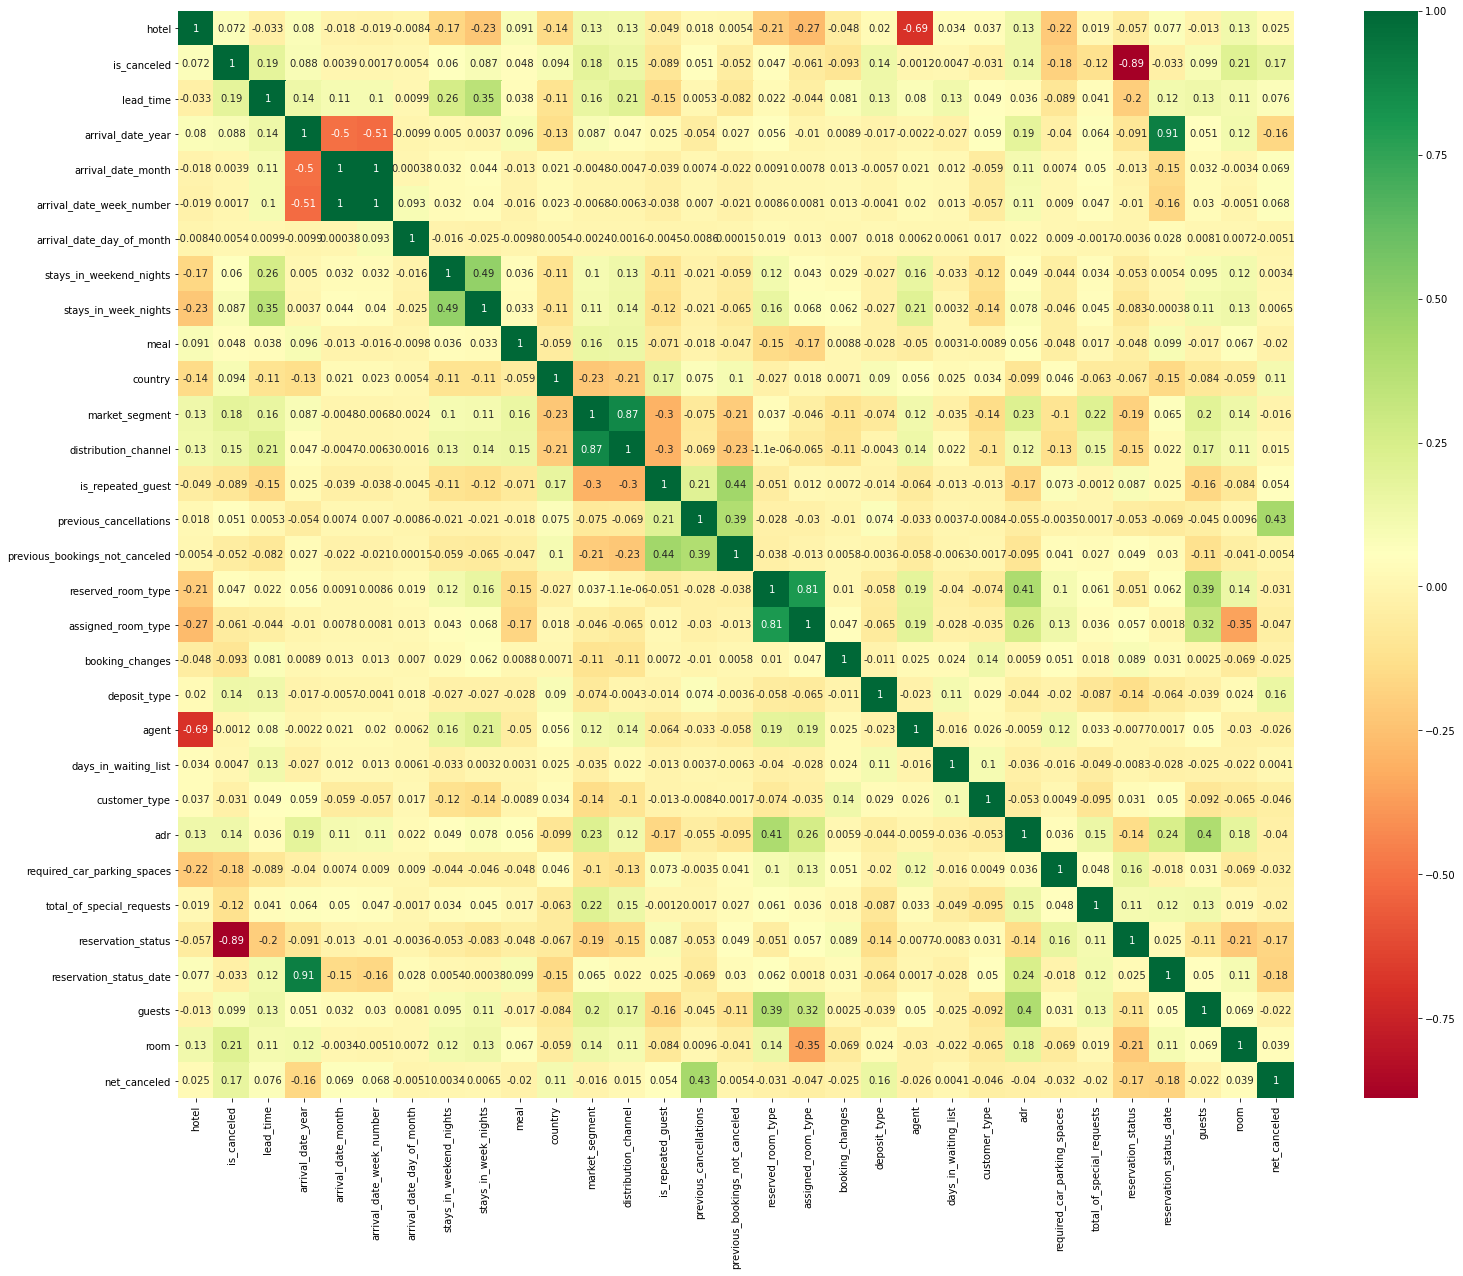

In [12]:
plt.figure(figsize = (25,20))
sns.heatmap(data1.corr(), cmap="RdYlGn", annot=True)

In [13]:
# removing columns with negative/low correlation with the target variable
data1.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number',
            'assigned_room_type','reserved_room_type','previous_cancellations','previous_bookings_not_canceled',
            'reservation_status','reservation_status_date', 'stays_in_weekend_nights', 'meal','stays_in_week_nights'],axis=1, inplace=True)

#### Chi2 Test for feature selection
* Null Hypothesis - There is no relation between the dependent and independent variable
* Alternate Hypothesis - There is a relation between the dependent and indenpendent variable

In [18]:
# Market Segment
data1['market_segment'].value_counts()

6    51550
5    13852
3    11774
4     4920
2     4190
1      692
0      226
Name: market_segment, dtype: int64

In [19]:
market_crosstab = pd.crosstab(index=data1['market_segment'], columns = data1['is_canceled'])
market_crosstab

is_canceled,0,1
market_segment,,
0,181,45
1,607,85
2,3681,509
3,10037,1737
4,3588,1332
5,11796,2056
6,33306,18244


In [20]:
from scipy import stats
(chi2, p , dof,_) = stats.chi2_contingency([market_crosstab.iloc[0].values, market_crosstab.iloc[1].values, market_crosstab.iloc[2].values, market_crosstab.iloc[3].values, market_crosstab.iloc[4].values, market_crosstab.iloc[5].values, market_crosstab.iloc[6].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  4262.247275182155
p-value   :  0.0
Degree of Freedom:  6


p<0.05, there is a relation between the two variables!

In [21]:
# Distribution Channel
data1['distribution_channel'].value_counts()

3    69025
1    12946
0     5052
2      181
Name: distribution_channel, dtype: int64

In [22]:
dist_crosstab = pd.crosstab(index=data1['distribution_channel'], columns = data1['is_canceled'])
dist_crosstab

is_canceled,0,1
distribution_channel,,
0,4406,646
1,11023,1923
2,145,36
3,47622,21403


In [23]:
(chi2, p , dof,_) = stats.chi2_contingency([dist_crosstab.iloc[0].values, dist_crosstab.iloc[1].values, dist_crosstab.iloc[2].values, dist_crosstab.iloc[3].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  2016.6985878001992
p-value   :  0.0
Degree of Freedom:  3


p<0.05, there is a relation between the two variables!

In [24]:
# Repeated Guests
data1['is_repeated_guest'].value_counts()

0    83840
1     3364
Name: is_repeated_guest, dtype: int64

In [25]:
repeatguest_crosstab = pd.crosstab(index=data1['is_repeated_guest'], columns = data1['is_canceled'])
repeatguest_crosstab

is_canceled,0,1
is_repeated_guest,,
0,60092,23748
1,3104,260


In [26]:
(chi2, p , dof,_) = stats.chi2_contingency([repeatguest_crosstab.iloc[0].values, repeatguest_crosstab.iloc[1].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  686.6449207656797
p-value   :  2.3982458220598675e-151
Degree of Freedom:  1


p<0.05, there is a relation between the two variables!

In [27]:
# Booking Changes
data1['booking_changes'].value_counts()

0     71400
1     10867
2      3483
3       862
4       347
5       113
6        57
7        29
8        14
9         8
10        6
13        5
14        3
15        3
16        2
17        2
11        1
12        1
18        1
Name: booking_changes, dtype: int64

In [28]:
bookingchange_crosstab = pd.crosstab(index=data1['booking_changes'], columns = data1['is_canceled'])
bookingchange_crosstab

is_canceled,0,1
booking_changes,,
0,49846,21554
1,9359,1508
2,2779,704
3,731,131
4,284,63
5,93,20
6,40,17
7,26,3
8,10,4


In [29]:
(chi2, p , dof,_) = stats.chi2_contingency([bookingchange_crosstab.iloc[0].values, bookingchange_crosstab.iloc[1].values, bookingchange_crosstab.iloc[2].values, bookingchange_crosstab.iloc[3].values, bookingchange_crosstab.iloc[4].values,bookingchange_crosstab.iloc[5].values,bookingchange_crosstab.iloc[6].values,bookingchange_crosstab.iloc[7].values,bookingchange_crosstab.iloc[8].values,bookingchange_crosstab.iloc[9].values, bookingchange_crosstab.iloc[10].values,bookingchange_crosstab.iloc[11].values,bookingchange_crosstab.iloc[12].values, bookingchange_crosstab.iloc[13].values, bookingchange_crosstab.iloc[14].values, bookingchange_crosstab.iloc[15].values, bookingchange_crosstab.iloc[16].values, bookingchange_crosstab.iloc[17].values, bookingchange_crosstab.iloc[18].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  1459.2444083551475
p-value   :  2.711116414020724e-299
Degree of Freedom:  18


p<0.05, there is a relation between the variables!

In [30]:
# Deposit Type
data1['deposit_type'].value_counts()

0    86059
1     1038
2      107
Name: deposit_type, dtype: int64

In [31]:
deposit_crosstab = pd.crosstab(index=data1['deposit_type'], columns = data1['is_canceled'])
deposit_crosstab

is_canceled,0,1
deposit_type,,
0,63060,22999
1,55,983
2,81,26


In [32]:
(chi2, p , dof,_) = stats.chi2_contingency([deposit_crosstab.iloc[0].values, deposit_crosstab.iloc[1].values, deposit_crosstab.iloc[2].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  2375.9640108751487
p-value   :  0.0
Degree of Freedom:  2


p<0.05, there is a relation between the variables!

In [33]:
# Customer Type
data1['customer_type'].value_counts()

2    71844
3    11684
0     3135
1      541
Name: customer_type, dtype: int64

In [34]:
customer_type_crosstab = pd.crosstab(index=data1['customer_type'], columns=data1['is_canceled'])
customer_type_crosstab

is_canceled,0,1
customer_type,,
0,2623,512
1,488,53
2,50184,21660
3,9901,1783


In [35]:
(chi2, p , dof,_) = stats.chi2_contingency([customer_type_crosstab.iloc[0].values, customer_type_crosstab.iloc[1].values, customer_type_crosstab.iloc[2].values, customer_type_crosstab.iloc[3].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  1410.8944663887823
p-value   :  1.2739552260826374e-305
Degree of Freedom:  3


p<0.05, there is a relation between the variables!

In [36]:
# Required Car Parking Spaces
data1['required_car_parking_spaces'].value_counts()

0    79898
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [37]:
car_crosstab = pd.crosstab(index=data1['required_car_parking_spaces'], columns=data1['is_canceled'])
car_crosstab

is_canceled,0,1
required_car_parking_spaces,,
0,55890,24008
1,7273,0
2,28,0
3,3,0
8,2,0


In [38]:
(chi2, p , dof,_) = stats.chi2_contingency([car_crosstab.iloc[0].values, car_crosstab.iloc[1].values, car_crosstab.iloc[2].values, car_crosstab.iloc[3].values], car_crosstab.iloc[4])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  3028.5269214149557
p-value   :  0.0
Degree of Freedom:  3


p<0.05, there is a relation between the two variables!

In [39]:
# Special Request
data1['total_of_special_requests'].value_counts()

0    43771
1    28971
2    11793
3     2313
4      320
5       36
Name: total_of_special_requests, dtype: int64

In [40]:
sprequest_crosstab = pd.crosstab(index=data1['total_of_special_requests'], columns=data1['is_canceled'])
sprequest_crosstab

is_canceled,0,1
total_of_special_requests,,
0,29211,14560
1,22470,6501
2,9278,2515
3,1917,396
4,286,34
5,34,2


In [41]:
(chi2, p , dof,_) = stats.chi2_contingency([sprequest_crosstab.iloc[0].values, sprequest_crosstab.iloc[1].values, sprequest_crosstab.iloc[2].values, sprequest_crosstab.iloc[3].values, sprequest_crosstab.iloc[4].values, sprequest_crosstab.iloc[5].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  1505.2427713344598
p-value   :  0.0
Degree of Freedom:  5


p<0.05, there is a relation between the variables!

In [42]:
# room
data1['room'].value_counts()

1    74225
0    12979
Name: room, dtype: int64

In [43]:
room_crosstab = pd.crosstab(index=data1['room'], columns=data1['is_canceled'])
room_crosstab

is_canceled,0,1
room,,
0,12363,616
1,50833,23392


In [44]:
(chi2, p, dof, _) = stats.chi2_contingency([room_crosstab.iloc[0].values, room_crosstab.iloc[1].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  3966.3875749774134
p-value   :  0.0
Degree of Freedom:  1


p<0.05, there is a relation between the variables!

In [45]:
# Net Canceled
data1['net_canceled'].value_counts()

0    86111
1     1093
Name: net_canceled, dtype: int64

In [46]:
canceled_crosstab = pd.crosstab(index=data1['net_canceled'], columns=data1['is_canceled'])
canceled_crosstab

is_canceled,0,1
net_canceled,,
0,63148,22963
1,48,1045


In [47]:
(chi2, p, dof, _) = stats.chi2_contingency([canceled_crosstab.iloc[0].values, canceled_crosstab.iloc[1].values])
print("chi2      : ", chi2)
print("p-value   : ", p)
print("Degree of Freedom: ", dof)

chi2      :  2567.73032056666
p-value   :  0.0
Degree of Freedom:  1


p<0.05, there is a relation between the variables!

## Train-Test Split

In [48]:
data2 = data1.copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87204 entries, 0 to 87203
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87204 non-null  int64  
 1   is_canceled                  87204 non-null  int64  
 2   lead_time                    87204 non-null  float64
 3   country                      87204 non-null  int32  
 4   market_segment               87204 non-null  int32  
 5   distribution_channel         87204 non-null  int32  
 6   is_repeated_guest            87204 non-null  int64  
 7   booking_changes              87204 non-null  int64  
 8   deposit_type                 87204 non-null  int32  
 9   agent                        87204 non-null  int64  
 10  days_in_waiting_list         87204 non-null  int64  
 11  customer_type                87204 non-null  int32  
 12  adr                          87204 non-null  float64
 13  required_car_par

In [49]:
X = data2.drop('is_canceled', axis='columns')
y = data2['is_canceled']
X.shape, y.shape

((87204, 17), (87204,))

In [50]:
#Divide by class to check the imbalance on target variable!
df_class_0 = data2[data2['is_canceled'] == 0]
df_class_1 = data2[data2['is_canceled'] == 1]
print(df_class_0.shape, df_class_1.shape)

(63196, 18) (24008, 18)


In [51]:
# Performing oversampling to handle the imbalance
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42, sampling_strategy = 0.5)
X_res, y_res = smk.fit_resample(X,y)
print(X_res.shape, y_res.shape)

(85646, 17) (85646,)


In [52]:
# Splitting the X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 15, stratify=y_res)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(59952, 17) (25694, 17) (59952,) (25694,)


## Model 1 - Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(random_state = 42)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [54]:
model_logreg.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [55]:
model_logreg.score(X_train, y_train)

0.7596410461702695

In [56]:
model_logreg.score(X_test, y_test)

0.7644586284735736

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

y_pred = model_logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15405  2182]
 [ 3870  4237]]
0.7644586284735736
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     17587
           1       0.66      0.52      0.58      8107

    accuracy                           0.76     25694
   macro avg       0.73      0.70      0.71     25694
weighted avg       0.76      0.76      0.76     25694



## Model 2 - Random Forest 

In [58]:
from sklearn.ensemble import RandomForestClassifier
model_randomforest = RandomForestClassifier(random_state=42)
model_randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
model_randomforest.score(X_train, y_train)

0.9945789965305578

In [60]:
model_randomforest.score(X_test, y_test)

0.8652992916634233

In [61]:
y_pred = model_randomforest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16006  1581]
 [ 1880  6227]]
0.8652992916634233
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     17587
           1       0.80      0.77      0.78      8107

    accuracy                           0.87     25694
   macro avg       0.85      0.84      0.84     25694
weighted avg       0.86      0.87      0.86     25694



## Model 3 - Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
model_decisiontree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [63]:
model_decisiontree.score(X_train, y_train)

0.9945956765412329

In [64]:
model_decisiontree.score(X_test, y_test)

0.8253288705534366

In [65]:
y_pred = model_decisiontree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15323  2264]
 [ 2224  5883]]
0.8253288705534366
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     17587
           1       0.72      0.73      0.72      8107

    accuracy                           0.83     25694
   macro avg       0.80      0.80      0.80     25694
weighted avg       0.83      0.83      0.83     25694



## Model 4 - XGBoost

In [66]:
from xgboost import XGBClassifier
model_xg = XGBClassifier(n_estimators = 90, max_depth = 3)
model_xg.fit(X_train, y_train)

[17:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
model_xg.score(X_train, y_train)

0.8534327461969575

In [68]:
model_xg.score(X_test, y_test)

0.8563088658830855

In [69]:
y_pred = model_xg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16022  1565]
 [ 2127  5980]]
0.8563088658830855
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     17587
           1       0.79      0.74      0.76      8107

    accuracy                           0.86     25694
   macro avg       0.84      0.82      0.83     25694
weighted avg       0.85      0.86      0.85     25694



## Model 5 - KNN

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [71]:
model_knn.score(X_train, y_train)

0.9260908726981585

In [72]:
model_knn.score(X_test, y_test)

0.7875379466023196

In [73]:
y_pred = model_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15923  1664]
 [ 3795  4312]]
0.7875379466023196
              precision    recall  f1-score   support

           0       0.81      0.91      0.85     17587
           1       0.72      0.53      0.61      8107

    accuracy                           0.79     25694
   macro avg       0.76      0.72      0.73     25694
weighted avg       0.78      0.79      0.78     25694



## Model 6 - Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
model_gaussnb = GaussianNB()
model_gaussnb.fit(X_train, y_train)

GaussianNB()

In [75]:
model_gaussnb.score(X_train, y_train)

0.609604350146784

In [76]:
model_gaussnb.score(X_test, y_test)

0.6071845567058457

In [77]:
y_pred = model_gaussnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8343 9244]
 [ 849 7258]]
0.6071845567058457
              precision    recall  f1-score   support

           0       0.91      0.47      0.62     17587
           1       0.44      0.90      0.59      8107

    accuracy                           0.61     25694
   macro avg       0.67      0.68      0.61     25694
weighted avg       0.76      0.61      0.61     25694



#### XGBoost and Random Forest appear to have better accuracies than other models. So we will hyperparameter tune them to see which is the best model!

In [78]:
# Random Forest
rf_tuned = RandomForestClassifier(n_estimators = 100,
                                random_state = 2,
                                criterion = 'gini',
                                max_features = 'auto',
                                max_depth = 7)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=2)

In [79]:
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16430  1157]
 [ 3273  4834]]
0.8275862068965517
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     17587
           1       0.81      0.60      0.69      8107

    accuracy                           0.83     25694
   macro avg       0.82      0.77      0.78     25694
weighted avg       0.83      0.83      0.82     25694



In [102]:
# XGBoost

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [103]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [104]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [105]:
classifier = xgboost.XGBClassifier()

In [106]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [107]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[17:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 33.21 seconds.


In [108]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [109]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [110]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train, y_train,cv=10)

[17:51:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [111]:
score

array([0.86074049, 0.87958639, 0.86788991, 0.86538782, 0.85788157,
       0.86972477, 0.86588824, 0.87222686, 0.87272727, 0.86505421])

In [112]:
score.mean()

0.8677107535131846

In [113]:
classifier.fit(X_train, y_train)

[17:52:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [114]:
classifier.score(X_train, y_train)

0.9106785428342674

In [115]:
classifier.score(X_test, y_test)

0.8714096676266833

In [116]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16045  1542]
 [ 1762  6345]]
0.8714096676266833
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     17587
           1       0.80      0.78      0.79      8107

    accuracy                           0.87     25694
   macro avg       0.85      0.85      0.85     25694
weighted avg       0.87      0.87      0.87     25694



In [ ]:
# pickling the model
import pickle
pickle_out = open('model.pkl', 'wb')
pickle.dump(classifier, pickle_out)
pickle_out.close()